# ESMValTool Prov Template

https://github.com/ESMValGroup/ESMValTool/blob/version2_provenance/esmvaltool/scatch_provenance.py

https://github.com/ESMValGroup/ESMValTool/issues/240#issuecomment-399019254

In [24]:
from pathlib import Path,PureWindowsPath
from provtemplates import provconv
import prov

inputdir = Path('/Users/snkin/Repos/enes_graph_use_case/prov_templates/test')
inputfile = inputdir / 'binding1.ttl'

template = inputdir / 'template1.xml'
print(inputfile)
binding = prov.read(inputfile)

template1 = prov.read(template)
b_dict = provconv.read_binding(binding)

new = provconv.instantiate_template(template1,b_dict)
print(template1.get_provn())
print(new.get_provn())

file:///C:/Users/snkin/Repos/enes_graph_use_case/prov_templates/\Users\snkin\Repos\enes_graph_use_case\prov_templates\test\binding1.ttl does not look like a valid URI, trying to serialize this will break.
file:///C:/Users/snkin/Repos/enes_graph_use_case/prov_templates/\Users\snkin\Repos\enes_graph_use_case\prov_templates\test\template1.xml does not look like a valid URI, trying to serialize this will break.
file:///C:/Users/snkin/Repos/enes_graph_use_case/prov_templates/?xml version="1.0" encoding="UTF-8" standalone="yes"? does not look like a valid URI, trying to serialize this will break.
file:///C:/Users/snkin/Repos/enes_graph_use_case/prov_templates/?xml version="1.0" encoding="UTF-8" standalone="yes"? does not look like a valid URI, trying to serialize this will break.
prov:document xmlns:prov="http://www.w3.org/ns/prov#" xmlns:ns2="http://openprovenance.org/prov/extension#" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:vargen="http://openprovenance.org/vargen#" xmln

\Users\snkin\Repos\enes_graph_use_case\prov_templates\test\binding1.ttl
document
  prefix vargen <http://openprovenance.org/vargen#>
  
  bundle vargen:bundleId
    prefix var <http://openprovenance.org/var#>
    prefix foaf <http://xmlns.com/foaf/0.1/>
    
    entity(var:quote, [prov:value='var:value'])
    entity(var:author, [prov:type='prov:Person', foaf:name='var:name'])
    wasAttributedTo(var:quote, var:author)
  endBundle
endDocument
document
  prefix vargen <http://openprovenance.org/vargen#>
  prefix uuid <urn:uuid:>
  
  bundle uuid:b9749417-8b36-45d2-ae5a-5eb781d6e55f
    prefix ex <http://example.com/#>
    prefix ns1 <http://orcid.org/0000-0002-3494-120>
    prefix foaf <http://xmlns.com/foaf/0.1/>
    
    entity(ex:quote1, [prov:value="A Little Provenance Goes a Long Way"])
    entity(ns1:X, [prov:type='prov:Person', foaf:name="Luc Moreau"])
    wasAttributedTo(ex:quote1, ns1:X)
  endBundle
endDocument


In [14]:
!pwd

/c/Users/snkin/Repos/enes_graph_use_case/prov_templates


In [10]:
import prov
from prov.dot import prov_to_dot
from prov.model import ProvDocument

# Create a new provenance document
doc = ProvDocument()
ns_dict = {
    'prov':'http://www.w3.org/ns/prov#',
    'var':'http://openprovenance.org/var#',
    'vargen':'http://openprovenance.org/vargen#',
    'tmpl':'http://openprovenance.org/tmpl#',
    'foaf':'http://xmlns.com/foaf/0.1/',
    'ex': 'http://example.org/',
    'orcid':'http://orcid.org/',
    'dc':'http://purl.org/dc/elements/1.1/',

    #document.set_default_namespace('http://example.org/0/')
    'rdf':'http://www.w3.org/1999/02/22-rdf-syntax-ns#',
    'rdfs':'http://www.w3.org/2000/01/rdf-schema#',
    'xsd':'http://www.w3.org/2001/XMLSchema#',
    'gen':'http://enes.org/provgen',
    'ex1': 'http://example.org/1/',
    'ex2': 'http://example.org/2/'
}
for key,val in ns_dict.items():
    doc.add_namespace(key,val)
    
doc.add_namespace('evt', 'http://www.esmvaltool.org/scheme')

mycollection = doc.entity('evt:datasets',
                     {'prov:type': 'prov:Collection'
                      })

doc.entity('gen:collection'),{'gen:script':'gen_data_collection'}

def gen_data_collection(doc,collection,**pars):
    
    id = 0
    for ds_id in pars['ds_ids']:
        ds_info = pars['ds_ids'][ds_id]
        dataset =  doc.entity('evt:dataset', 
           {'ex:source': ds_info['source'], 
            'ex:name':ds_id,
            'dc:identifier':ds_info['tracking_id']
        })
        
        for sfile in ds_info['files']:
            file_info = ds_info[sfile]
            file_ent = doc.entity('evt:infile',
                   {'dc:identifier': file_info['tracking_id'],
                    'ex:name': sfile
                   })
            doc.used(dataset,file_ent)
        
        doc.hadMember(collection, dataset) 
    return doc
   
mypars = {'ds_ids':['ds1','ds2','ds3'],
          'ds1':  { 
              'files':['ds1file1','ds1file2'],
              'source':'ESGF DKRZ',
              'tracking_id':'hdl.net:222/1111.1111.1111',
              'ds1file1': {'tracking_id':'hdl.net:111/000.000.0001'},
              'ds2file2': {'tracking_id':'hdl.net:111/000.000.0002'}
          },
          'ds2': {
              'files' : ['ds2file1'],
              'ds2file1':{'tracking_id':'hdl.net:111/000.000.0003'}
          },
          'ds3':{ 
              'files' : [],
              'tracking_id':'hdl.net:222/000.000.666'
          }
          }      

    
result = gen_data_collection(doc,mycollection,mypars)

TypeError: gen_data_collection() takes 2 positional arguments but 3 were given

In [26]:
def gen_data(a,b):
    print(a,b)
    
tst = 1
tst2 = 'other'
my_call = gen_data

eval('m(tst,tst2)')

1 other


In [11]:
ns = prov.identifier.Namespace('ll','http://test.dkrz.de/ll')
newid = prov.identifier.QualifiedName(ns,'tst')
collection.identifier = newid

AttributeError: can't set attribute

In [1]:
import datetime as dt

# visualize the graph
from prov.dot import prov_to_dot
from prov.model import ProvDocument

# Create a new provenance document
d1 = ProvDocument()

# Declaring namespaces for various prefixes
ns_dict = {
    'prov':'http://www.w3.org/ns/prov#',
    'var':'http://openprovenance.org/var#',
    'vargen':'http://openprovenance.org/vargen#',
    'tmpl':'http://openprovenance.org/tmpl#',
    'foaf':'http://xmlns.com/foaf/0.1/',
    'ex': 'http://example.org/',
    'orcid':'http://orcid.org/',
    'dc':'http://purl.org/dc/elements/1.1/',

    #document.set_default_namespace('http://example.org/0/')
    'rdf':'http://www.w3.org/1999/02/22-rdf-syntax-ns#',
    'rdfs':'http://www.w3.org/2000/01/rdf-schema#',
    'xsd':'http://www.w3.org/2001/XMLSchema#',
    'ex1': 'http://example.org/1/',
    'ex2': 'http://example.org/2/'
}
for key,val in ns_dict.items():
    d1.add_namespace(key,val)
    
d1.add_namespace('evt', 'http://www.esmvaltool.org/scheme')

# Entity:
outfile = d1.entity(
    'var:outfile', {
        'evt:caption': 'var:caption',
        'evt:variable': 'var:variable',
        'evt:plottype': 'var:plottype',
        'evt:domain': 'var:domain',
        'evt:theme': 'var:theme',
        'evt:realm': 'var:realm',
#       'dc:format': 'var:outfile_format', # mime type
#       'dc:subject': 'var:outfile_subject',
#       'dc:type':'var:outfile_type',
#       'dc:title':'var:outfile_title',
#       'dc:description','var:outfile_description'
    })
diagnostic = d1.entity(
    'evt:diagnostic', {
        'evt:description': 'var:diag_description',
        'evt:references': 'var:references',
        'evt:statistics': 'var:statistics'
    })
recipe = d1.entity(
    'evt:recipe', {
        'evt:description': 'var:nml_description',
        'evt:project': 'var:project',
        'evt:references': 'var:nml_references'
    })
dataset = d1.entity('var:dataset',  
          {'tmpl:linked':'var:infile'}          
#         {   'dcType:Dataset' }
)
#dataset2 = d1.entity('var:dataset2')
#dataset3 = d1.entity('var:dataset3')
obs1 = d1.entity('evt:obs1')
datasets = d1.entity('evt:datasets',
                     {'prov:type': 'prov:Collection'
                      })  # c is a collection, with unknown content
d1.hadMember(datasets, dataset)
#d1.hadMember(datasets, dataset2)
#d1.hadMember(datasets, dataset3)
d1.hadMember(datasets, obs1)

infile = d1.entity('var:infile', {'tmpl:linked':'var:dataset','dc:identifier': 'var:trackingID'})
#infile12 = d1.entity('evt:infile12.nc', {'evt:trackingID': 'TrackingID'})
#infile13 = d1.entity('evt:infile13.nc', {'evt:trackingID': 'TrackingID'})
#infile2 = d1.entity('evt:infile2.nc', {'evt:trackingID': 'TrackingID'})
#infile3 = d1.entity('evt:infile3.nc', {'evt:trackingID': 'TrackingID'})
#infile4 = d1.entity('evt:infile4.nc', {'evt:trackingID': 'TrackingID'})
preprocfile = d1.entity('evt:preproc_file')
software = d1.entity('evt:software', {
    'evt:ESMValTool': 'var:ESMValTool',
    'evt:Python': 'var:Python',
    'evt:NCL': 'var:NCL',
#   'dcType:software': 'ESMValTool'
})
preproc_set = d1.entity(
    'evt:preproc_setting', {   
        'evt:derivation': 'var:derivation',
        'evt:timesel': 'var:timesel',
        'evt:cmor': 'var:cmor_fixes',
        'evt:levelint': 'var:levelint',
        'evt:regridding': 'var:regridding',
        'evt:masking': 'var:masking',
        'evt:multimeanstat': 'var:multimeanstat'
    })
diag_set = d1.entity('evt:diag_setting')

# Agent:
entity(var:author, [prov:type='prov:Person', foaf:name='var:name'])
author_nml = d1.agent('var:Author_nml',{
     'prov:type':'prov:Person','foaf_name'='var:name'
})
#author_nml2 = d1.agent('evt:Author_nml2')
author_diag = d1.agent('var:Author_diag',{
     'prov:type':'prov:Person','foaf_name'='var:name'
})
#author_diag2 = d1.agent('evt:Author_diag2')

# Adding an activity
diagrun = d1.activity('evt:diagrun')
preprocrun = d1.activity('evt:preprocrun')

d1.wasDerivedFrom(outfile, recipe)

d1.wasGeneratedBy(outfile, diagrun, dt.datetime.now())
d1.wasGeneratedBy(preprocfile, preprocrun, dt.datetime.now())

d1.used(diagrun, diagnostic)
d1.used(diagrun, preprocfile)
d1.used(diagrun, diag_set)
d1.used(diagrun, software)
d1.used(preprocrun, datasets)
d1.used(preprocrun, software)
d1.used(preprocrun, preproc_set)
d1.used(dataset, infile)
#d1.used(dataset1, infile12)
#d1.used(dataset1, infile13)
#d1.used(dataset2, infile2)
#d1.used(dataset3, infile3)
#d1.used(obs1, infile4)

d1.wasAttributedTo(recipe, author_nml)
#d1.wasAttributedTo(recipe, author_nml2)
d1.wasAttributedTo(diagnostic, author_diag)
#d1.wasAttributedTo(diagnostic, author_diag2)

print(d1.get_provn())
d1.serialize('article-prov.xml', format='xml')
dot = prov_to_dot(d1)
dot.write_png('article-prov.png')
#
# Or save to a PDF
dot.write_pdf('article-prov.pdf')

document
  prefix var <http://openprovenance.org/var#>
  prefix vargen <http://openprovenance.org/vargen#>
  prefix tmpl <http://openprovenance.org/tmpl#>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix ex <http://example.org/>
  prefix orcid <http://orcid.org/>
  prefix dc <http://purl.org/dc/elements/1.1/>
  prefix rdf <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
  prefix rdfs <http://www.w3.org/2000/01/rdf-schema#>
  prefix ex1 <http://example.org/1/>
  prefix ex2 <http://example.org/2/>
  prefix evt <http://www.esmvaltool.org/scheme>
  
  entity(var:outfile, [evt:caption="var:caption", evt:variable="var:variable", evt:plottype="var:plottype", evt:domain="var:domain", evt:theme="var:theme", evt:realm="var:realm"])
  entity(evt:diagnostic, [evt:description="var:diag_description", evt:references="var:references", evt:statistics="var:statistics"])
  entity(evt:recipe, [evt:description="var:nml_description", evt:project="var:project", evt:references="var:nml_references"])
  entity(

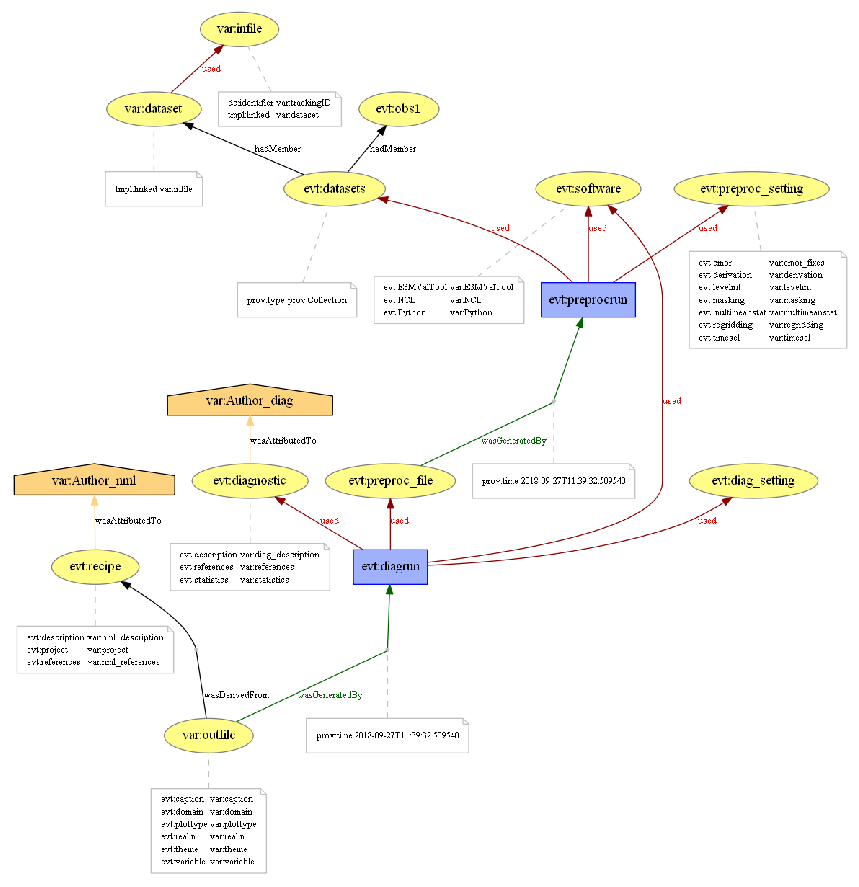

In [2]:
%matplotlib  inline
d1.plot()

In [3]:
from provtemplates import provconv

instance_dict = {}
entities ={"var:Author_nml": ["evt:Author_nml1","evt:Autor_nml2"], "var:Author_diag":["evt:Author_diag1","evt:Author_diag2"],
                 "var:outfile":"evt:outfile1",
                 "var:dataset":["evt:dataset1","evt:dataset2","evt:dataset3","evt:dataset4"],
                 "var:infile":["evt:infile1","evt:infile2","evt:infile3"],
                 "var:preproc_file":"evt:preproc_file1"
          }

var_outfile =  {
        'var:caption':'outfile_caption',
         'var:variable':'outfile_variable',
         'var:plottype':'plottype',
         'var:domain':'domain',
        'var:theme':'theme',
        'var:realm':'realm'
    }

var_diagnostic = {
       'var:diag_description':'diag_description',
       'var:references':'references',
       'var:statistics':'statistics'
    }

var_recipe = {
        'var:nml_description':'nml_description',
        'var:project':'project',
        'var:nml_references':'nml_references'
}

var_software = {
                 'var:ESMValTool':"v1.0.1",
                 'var:Python':"v3.0.1",
                 'var:NCL':"v1.0.1"
}
var_infile = {'var:tracking_id:':"000.000.0000",'var:tracking_id:':"000.000.0001",'var:tracking_id:':"000.000.0002"}

var_preproc_setting = {
                 'var:derivation': 'Derivation',
                 'var:timesel': 'Timesel',
                 'var:cmor': 'CMOR_fixes',
                 'var:levelint': 'Level interpolation',
                 'var:regridding': 'Regridding',
                 'var:masking': 'Masking',
                 'var:multimeanstat': 'Multimean statistics',
                }

instance_dict.update(entities)
instance_dict.update(var_outfile)
instance_dict.update(var_diagnostic)
instance_dict.update(var_recipe)
instance_dict.update(var_software)
instance_dict.update(var_infile)
instance_dict.update(var_preproc_setting)

new = provconv.instantiate_template(d1,instance_dict)
print(new.get_provn())

document
  prefix var <http://openprovenance.org/var#>
  prefix vargen <http://openprovenance.org/vargen#>
  prefix tmpl <http://openprovenance.org/tmpl#>
  prefix evt <http://www.esmvaltool.org/scheme>
  prefix rdf <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
  prefix ex <http://example.org/>
  prefix rdfs <http://www.w3.org/2000/01/rdf-schema#>
  prefix ex2 <http://example.org/2/>
  prefix orcid <http://orcid.org/>
  prefix ex1 <http://example.org/1/>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix dc <http://purl.org/dc/elements/1.1/>
  
  entity(evt:dataset1)
  entity(evt:dataset2)
  entity(evt:dataset3)
  entity(evt:dataset4)
  entity(evt:infile1, [dc:identifier="var:trackingID"])
  entity(evt:infile2, [dc:identifier="var:trackingID"])
  entity(evt:infile3, [dc:identifier="var:trackingID"])
  entity(evt:outfile1, [evt:caption="outfile_caption", evt:variable="outfile_variable", evt:plottype="plottype", evt:domain="domain", evt:theme="theme", evt:realm="realm"])
  entity(evt:di

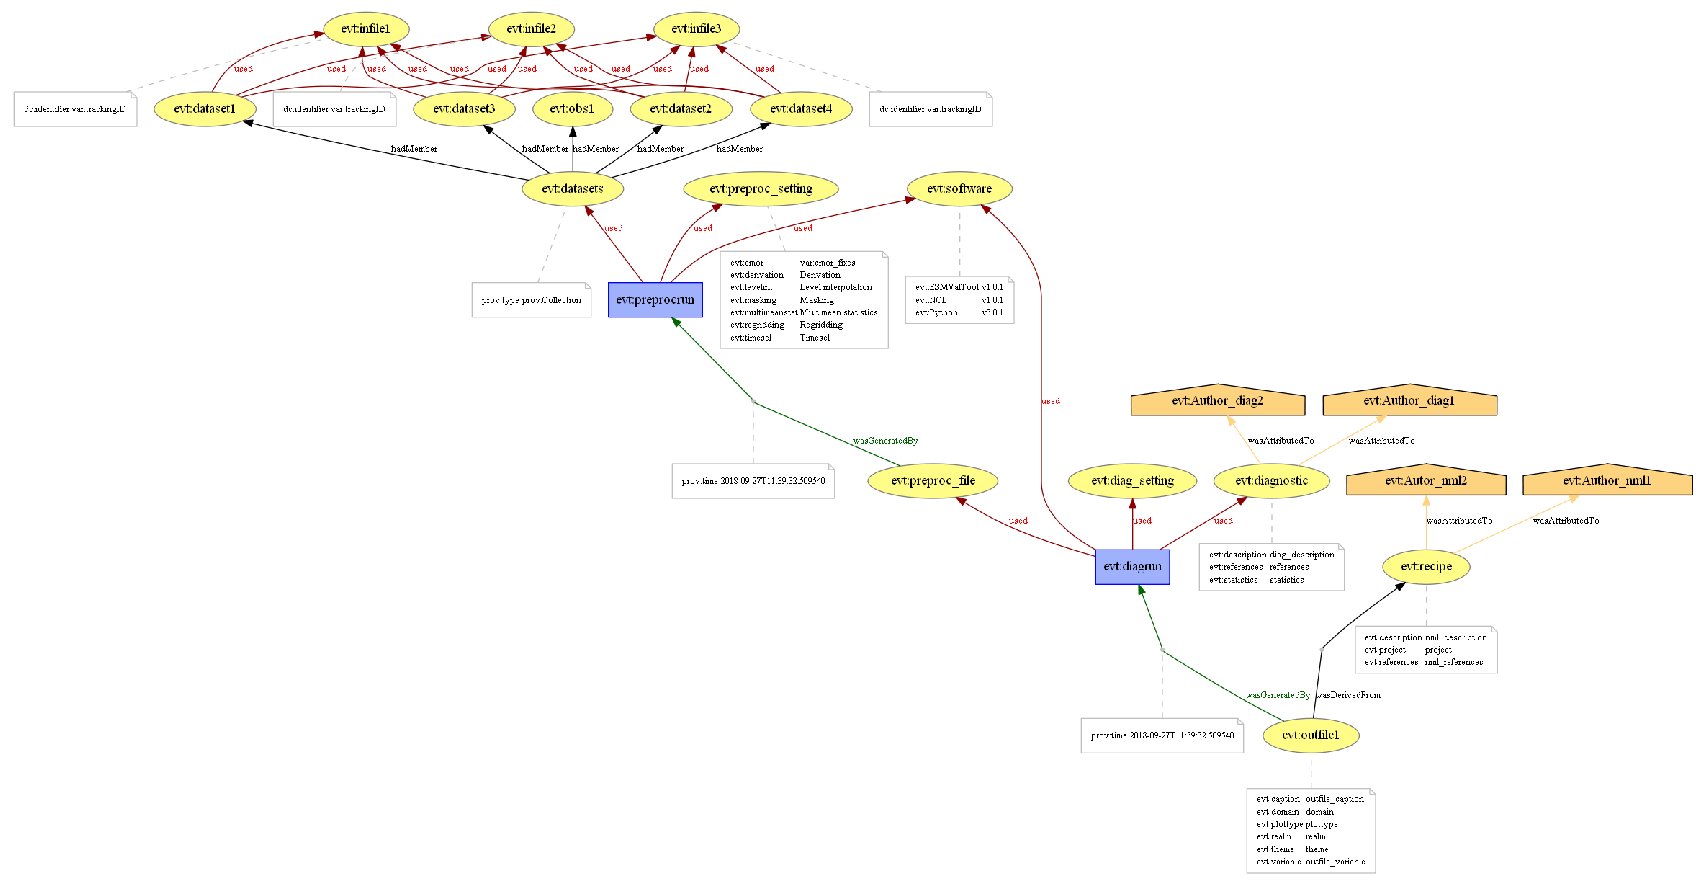

In [4]:
%matplotlib  inline
new.plot()

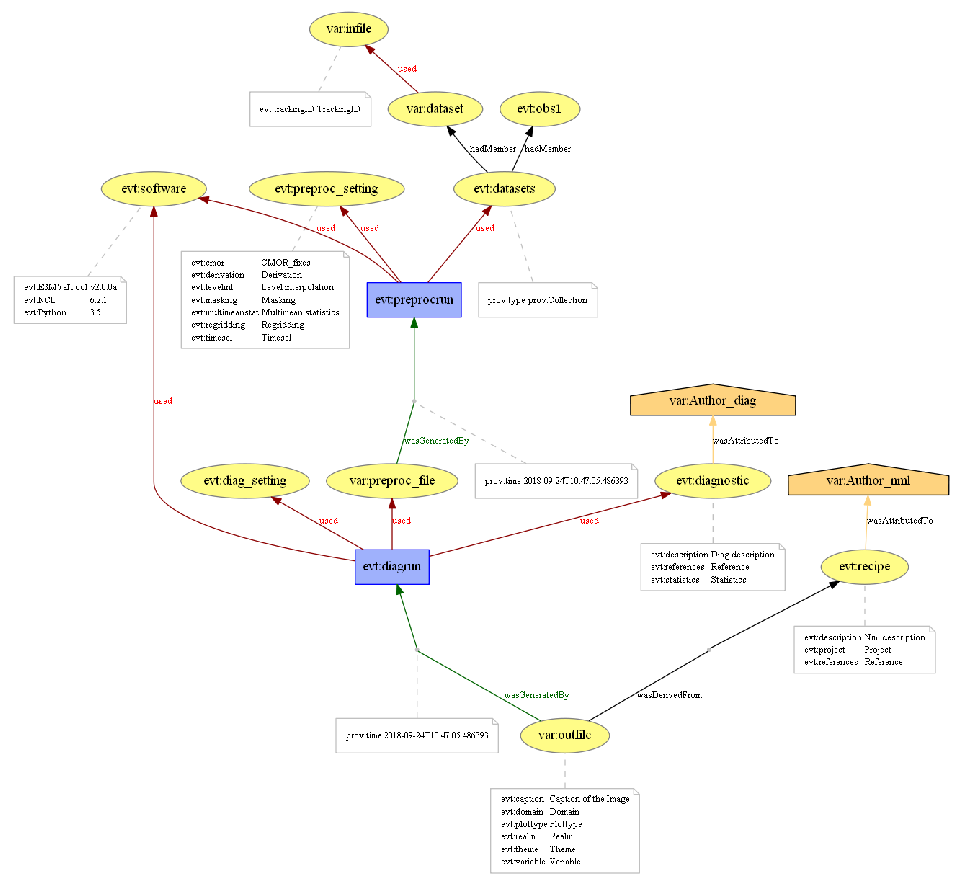

In [5]:
%matplotlib  inline
d1.plot()